<a href="https://colab.research.google.com/github/SJ9VRF/YapAiTek-assignment/blob/master/yapaitek_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def evaluate(y_true, y_pred):
    MAE = mean_absolute_error(y_true, y_pred)
    R_Squared = r2_score(y_true, y_pred)
    return MAE,R_Squared

def split(df, headSize) :
    hd = df.head(headSize)
    tl = df.tail(len(df)-headSize)
    return hd, tl

def replace_nan(data_df, column_title):
  mean_val = data_df[column_title].mean()
  for i in range(len(data_df)):
    if data_df.iloc[i][column_title] == np.nan:
      item_df = data_df.loc[data_df['Name of show'] == data_df.iloc[i]['Name of show']]
      temp_nan = item_df[column_title].mean()
      if temp_nan != np.nan:
        data_df.iloc[i][column_title] == temp_nan
      else:
        data_df.iloc[i][column_title] = mean_val
    if i%1000 == 0:
      print(i/len(data_df))
  return data_df

Market share is the percent of total sales in an industry generated by a particular company. 
Market share is calculated by taking the company's sales over the period and dividing it by the total sales of the industry over the same period.

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pathPrefix = '/content/drive/My Drive'+'/yapaitek/'
data_filename = 'data.csv'
test_filename = 'test.csv'
data = pd.read_csv(pathPrefix + data_filename)
test = pd.read_csv(pathPrefix + test_filename)
data['Start_time'] = pd.to_datetime(data['Start_time'])
data['End_time'] = pd.to_datetime(data['End_time'])
test['Start_time'] = pd.to_datetime(test['Start_time'])
test['End_time'] = pd.to_datetime(test['End_time'])
data['length_sec'] = (data['End_time']-data['Start_time']).dt.total_seconds()
test['length_sec'] = (test['End_time']-test['Start_time']).dt.total_seconds()

**Repalce missing Values**

In [79]:
data = replace_nan(data, 'Temperature in Montreal during episode')
test = replace_nan(test, 'Temperature in Montreal during episode')
data = replace_nan(data, 'length_sec')
test = replace_nan(test, 'length_sec')

0.0
0.0016216496717781064
0.003243299343556213
0.004864949015334319
0.006486598687112426
0.008108248358890532
0.009729898030668638
0.011351547702446745
0.012973197374224851
0.014594847046002958
0.016216496717781064
0.017838146389559172
0.019459796061337277
0.021081445733115385
0.02270309540489349
0.024324745076671598
0.025946394748449703
0.02756804442022781
0.029189694092005915
0.030811343763784024
0.03243299343556213
0.034054643107340236
0.035676292779118345
0.037297942450896446
0.038919592122674554
0.04054124179445266
0.04216289146623077
0.04378454113800887
0.04540619080978698
0.04702784048156509
0.048649490153343196
0.0502711398251213
0.051892789496899405
0.05351443916867751
0.05513608884045562
0.05675773851223372
0.05837938818401183
0.06000103785578994
0.06162268752756805
0.06324433719934615
0.06486598687112426
0.06648763654290236
0.06810928621468047
0.06973093588645858
0.07135258555823669
0.07297423523001478
0.07459588490179289
0.076217534573571
0.07783918424534911
0.0794608339171

**Categorical to OneHot Feature**

In [0]:
categorical_columns = [
        'Station', 'Channel Type', 'Season','Year',
       'Day of week','Genre', 'First time or rerun',
       '# of episode in the season', 'Movie?',
       'Game of the Canadiens during episode?']
test['Market Share_total'] = np.array([0.5] * len(test))
tmp = pd.concat([data, test])
tmp = pd.get_dummies( tmp, columns = categorical_columns )
data, test = split(tmp, len(data))
# "Episode" Feature is same as "Name of show" Feature, So "Episode" is redundant
# So, we drop "Episode"
data = data.drop(['Episode'], axis=1)
test = test.drop(['Episode'], axis=1)
#del(test)
data['hour'] = data['Start_time'].apply(lambda x: x.hour)
test['hour'] = test['Start_time'].apply(lambda x: x.hour)
data = data[data['Temperature in Montreal during episode'].notna()]
data = data[data['length_sec'].notna()]
test = test[test['Temperature in Montreal during episode'].notna()]
test = test[test['length_sec'].notna()]

data_dev_first = '2018-08-19 00:00:00'

first_show = data.sort_values('Start_time', ascending=False).groupby('Name of show').head(1)

# split train and dev_data
dev_data = data.loc[(data['Start_time'] >= data_dev_first)]
train_data = data.loc[(data['Start_time'] < data_dev_first)]
dev_data_fsh = first_show.loc[(first_show['Start_time'] >= data_dev_first)]
train_data_fsh = first_show.loc[(first_show['Start_time'] < data_dev_first)]

data = train_data
del(train_data)

#name of columns after one-hot transformation
reg_val = [   
       'Market Share_total',
       'Temperature in Montreal during episode', 'length_sec', 'Station_ARTV+',
       'Station_Canal D+', 'Station_Canal Vie+', 'Station_Evasion+',
       'Station_Historia+', 'Station_LCN+', 'Station_MAX+',
       'Station_Meteomedia+', 'Station_MusiquePlus+ (retired Aug 25, 2019)',
       'Station_PYC Online Stream Fr CBC-8+',
       'Station_PYC Online Stream Fr CBC-9+', 'Station_RDI+', 'Station_RDS+',
       'Station_RDS2+', 'Station_SRC Total', 'Station_Series++',
       'Station_TQ Total', 'Station_TV5+', 'Station_TVA Total',
       'Station_Teletoon Fr.+', 'Station_Unis TV+', 'Station_V Total',
       'Station_VRAK+', 'Station_Z+', 'Channel Type_General Channel',
       'Channel Type_Specialty Channel', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Year_2016', 'Year_2017', 'Year_2018',
       'Year_2019', 'Day of week_Friday', 'Day of week_Monday',
       'Day of week_Saturday', 'Day of week_Sunday', 'Day of week_Thursday',
       'Day of week_Tuesday', 'Day of week_Wednesday', 'Genre_Amateur Sports',
       'Genre_Analysis and Interpretation',
       'Genre_Animated Television Programs & Films', 'Genre_Filler',
       'Genre_Formal Education and Pre-School', 'Genre_Game Shows',
       'Genre_General Entertainment and Human Interest',
       'Genre_Infomercials, Promotional and Corporate Videos',
       'Genre_Informal Education and Recreation and Leisure',
       'Genre_Interstitial', 'Genre_Long-form Documentary',
       'Genre_Music Video Clips', 'Genre_Music Video Programs',
       'Genre_Music and Dance other than Music Video Programs or Clips',
       'Genre_News', 'Genre_Ongoing Comedy Series (Sitcoms)',
       'Genre_Ongoing Dramatic Series', 'Genre_Other Drama',
       'Genre_Professional Sports',
       'Genre_Programs of Comedy Sketches, Improvision, Unscripted Works',
       'Genre_Reality Programs', 'Genre_Religion',
       'Genre_Reporting and Actualities',
       'Genre_Specials, Mini-Series or Made-for-TV Feature Films',
       'Genre_Theatre Feature Films Aired on TV', 'Genre_Unknown',
       'Genre_Variety', 'First time or rerun_No', 'First time or rerun_Yes',
       '# of episode in the season_No', '# of episode in the season_Yes',
       'Movie?_No', 'Movie?_Yes', 'Game of the Canadiens during episode?_No',
       'Game of the Canadiens during episode?_Yes',
        'hour']

data_train_reg = data[reg_val]
data_dev_reg = dev_data[reg_val]
test = test[reg_val]
train_data_fsh = train_data_fsh[reg_val]
dev_data_fsh = dev_data_fsh[reg_val]
del(data)
del(dev_data)

**Scaling**

In [0]:
scaler = StandardScaler()
scaler = scaler.fit(data_train_reg)
scaled_features = scaler.transform(data_train_reg)
scaled_features_dev = scaler.transform(data_dev_reg)
scaled_features_test = scaler.transform(test)

scaled_features_df = pd.DataFrame(scaled_features,  columns=data_train_reg.columns)
scaled_features_dev_df = pd.DataFrame(scaled_features_dev, columns=data_dev_reg.columns)
scaled_features_test_df = pd.DataFrame(scaled_features_test, columns=test.columns)

del(data_train_reg)
del(data_dev_reg)
del(test)
del(scaled_features)
del(scaled_features_dev)
del(scaled_features_test)
y = scaled_features_df['Market Share_total']
x = scaled_features_df.drop(['Market Share_total'], axis=1)
x_test = scaled_features_test_df.drop(['Market Share_total'], axis=1)
x_test = np.array(x_test)
x, y = np.array(x), np.array(y)
y_dev = scaled_features_dev_df['Market Share_total']
x_dev = scaled_features_dev_df.drop(['Market Share_total'], axis=1)
x_dev, y_dev = np.array(x_dev), np.array(y_dev)

del(scaled_features_test_df)
del(scaled_features_df)
del(scaled_features_dev_df)

poly_feat = PolynomialFeatures(degree=1, include_bias=False)
x_ = poly_feat.fit_transform(x)
xdev_ = poly_feat.transform(x_dev)
x_test_ = poly_feat.transform(x_test)

del x
del x_dev
del reg_val
del x_test

**Dimension Reduction**

In [82]:
pca = PCA()
pca.fit_transform(x_)
pca_variance = pca.explained_variance_
print(len(pca_variance))
print(pca_variance)
print(pca_variance[79-11])
del pca_variance
del pca

79
[3.39508292e+00 3.04692390e+00 2.51142062e+00 2.44116176e+00
 2.33489996e+00 2.17350205e+00 2.06435783e+00 1.90900249e+00
 1.78900366e+00 1.76265779e+00 1.70768619e+00 1.67494729e+00
 1.58960563e+00 1.57012629e+00 1.55117466e+00 1.44842256e+00
 1.41638510e+00 1.32669485e+00 1.29555866e+00 1.25984891e+00
 1.24662123e+00 1.20069096e+00 1.19388908e+00 1.17757826e+00
 1.17214026e+00 1.17119714e+00 1.16580847e+00 1.16369788e+00
 1.15310341e+00 1.13562667e+00 1.12699482e+00 1.12129430e+00
 1.11507059e+00 1.08471614e+00 1.06195379e+00 1.02517437e+00
 1.00777212e+00 1.00207827e+00 1.00044772e+00 9.99016870e-01
 9.97883982e-01 9.94370362e-01 9.81745878e-01 9.75929301e-01
 9.66989855e-01 9.45533487e-01 8.99779676e-01 8.95354924e-01
 8.72903144e-01 8.59075066e-01 8.31676397e-01 7.78128659e-01
 7.63643383e-01 7.36236688e-01 6.55905017e-01 6.35970683e-01
 5.73014156e-01 5.65713021e-01 4.09087413e-01 3.88509934e-01
 3.70508795e-01 3.44656821e-01 3.08845449e-01 2.41173749e-01
 1.93250813e-01 1.443

In [0]:
pca2 = PCA(n_components=34)
pca2.fit(x_)
x_ = pca2.transform(x_)
xdev_ = pca2.transform(xdev_)
x_test_ = pca2.transform(x_test_)
del pca2

**Compute Degree_2 Feature**

In [0]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
poly_feat.fit(x_)
x_ = poly_feat.transform(x_)
xdev_ = poly_feat.transform(xdev_)
x_test_ = poly_feat.transform(x_test_)

In [0]:
# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

In [86]:
y_pred = model.predict(xdev_)
y_pred_ = model.predict(x_)
print('MAE, R-Score')
print(evaluate(y_pred_, y))
print(evaluate(y_pred, y_dev))

MAE, R-Score
(0.30186724917237595, 0.6395927056645858)
(0.35314016986727287, 0.4878192698923055)


In [0]:
x_ = np.concatenate((x_, xdev_), axis=0)
y = np.concatenate((y, y_dev), axis=0)
model = LinearRegression().fit(x_, y)

In [0]:
# Step 5: Predict
y_pred_test = model.predict(x_test_)

# **Using Time Series**

In [0]:
Name_of_show = data['Name of show'].unique()

In [0]:
time_ser_dic = {}
n = len(Name_of_show)
i = 0
for item in Name_of_show:
  data_series = data[data['Name of show']==item]
  data_series['Start_time'] = pd.to_datetime(data_series['Start_time'])
  time_ser_dic[item] = data_series[['Start_time', 'Market Share_total']]

0.00014954389113204725
0.1496934350231793
0.2992373261552266
0.4487812172872738
0.5983251084193211
0.7478689995513683
0.8974128906834156


In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

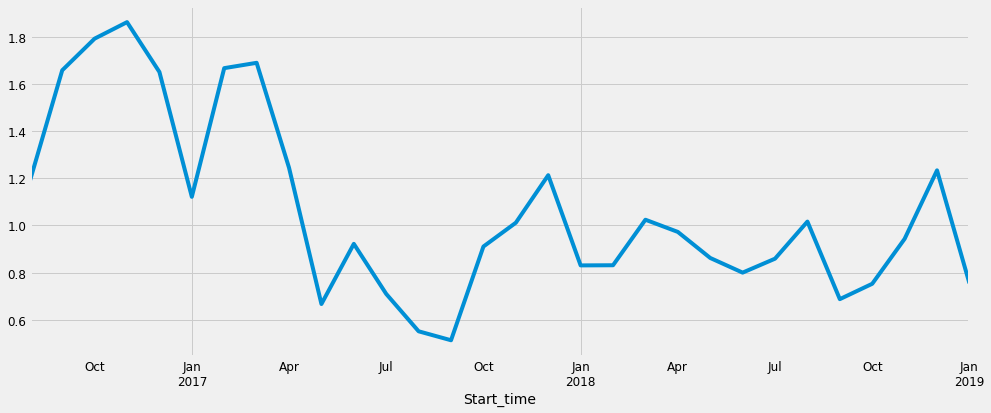

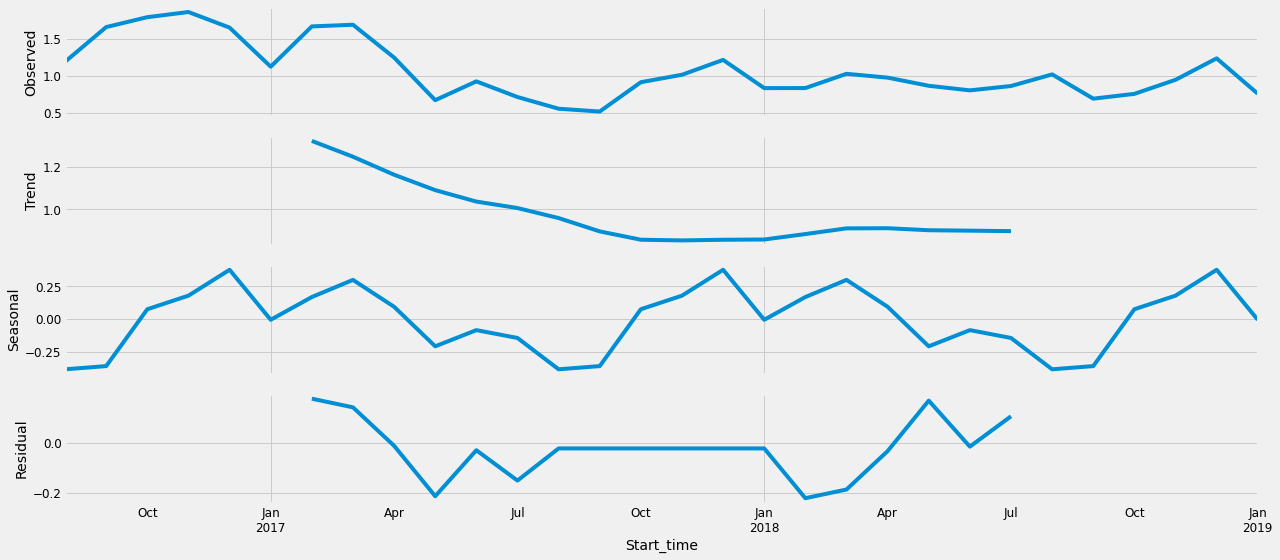

In [0]:
data_ind = time_ser_dic[Name_of_show[2]].sort_values('Start_time')
data_ind = data_ind.set_index('Start_time')
y = data_ind['Market Share_total'].resample('MS').mean()

y.plot(figsize=(15, 6))
plt.show()

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,enforce_invertibility=False)
      results = mod.fit()
      print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so infer

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:91.21846857651478
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:28.217323260742514
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:14.430936711949379
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2.1692868581897917
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:62.71076571893122
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10.856834600424836
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3.937035557224533
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1.587629623594884
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:10.398895676054485
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:9.029974261315424
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-0.8625088834521186
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2.2381648549174837
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:11.466264599166406
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:10.818574942347139
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-1.6218497344600502


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so infer

ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2.4207886553412155
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:13.577356241710786
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:10.870359538333057
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:0.8477940646748579
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-3.022796167572162
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:10.690330890248719


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so infer

ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:7.6853571618535
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-1.2454441136147913


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-7.113123381681545
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:12.191910452523029
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:10.88723005436987
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:0.8372885570497361
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2.2360883623076275


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check m

ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:12.940141779489124
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:12.157596426143805
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-0.7112914256049248


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so infer

ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1.5113614585527149


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [0]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0189      2.657      0.007      0.994      -5.189       5.227
ma.L1          1.0000   6.27e+04   1.59e-05      1.000   -1.23e+05    1.23e+05
ar.S.L12      -0.1996      0.165     -1.208      0.227      -0.523       0.124
sigma2         0.0088    549.188   1.59e-05      1.000   -1076.380    1076.398


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ValueError: ignored

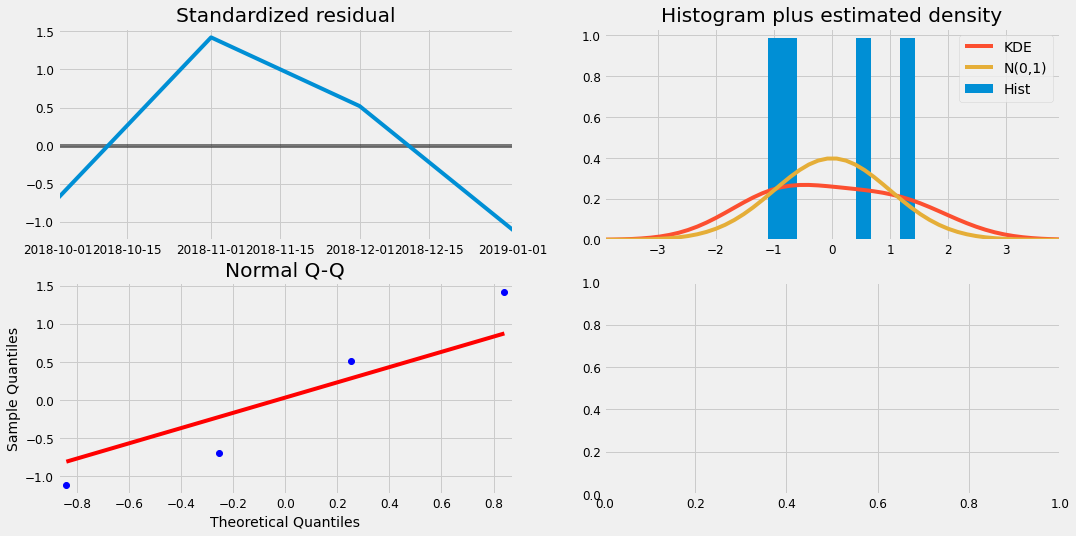

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

**Arima Model for each Name of Show**

In [76]:
# hard to find proper order
time_ser_dic = {}
n = len(Name_of_show)
i = 0
model_name_of_show = {}
for item in Name_of_show:
  data_series = data[data['Name of show']==item]
  time_ser_dic[item] = data_series['Market Share_total'].tolist()
  print(time_ser_dic[item])
  model = ARIMA(time_ser_dic[item], order=(2, 0, 0))
  model_fit = model.fit(disp=False)
  model_name_of_show[item] = model_fit
  if i%1000==0:
    print(i/n)

[0.9, 1.9, 1.7, 1.2, 1.6, 1.8]
0.0
[0.5, 1.2, 0.5, 0.1, 6.4]


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: divide by zero encountered in arctanh
  invarcoefs = 2*np.arctanh(params)


LinAlgError: ignored